In [36]:
import tensorflow as tf
tf.__version__
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [7]:
data = load_breast_cancer()
type(data)

sklearn.utils.Bunch

In [8]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
#complete data
data.data.shape

(569, 30)

In [12]:
#target
data.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
#meaning of target data
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [14]:
#feature names
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
X_train,X_test,y_train,y_test = train_test_split(data.data,
                                                data.target,
                                                test_size =0.33)
N, D = X_train.shape

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
#build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 31        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [26]:
hist = model.fit(X_train,
                y_train,
                validation_data=(X_test,y_test),
                epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 2s 6ms/sample - loss: 0.3406 - accuracy: 0.8793 - val_loss: 0.3543 - val_accuracy: 0.9043
Epoch 2/100
381/381 [==============================] - 0s 200us/sample - loss: 0.3150 - accuracy: 0.8793 - val_loss: 0.3376 - val_accuracy: 0.9149
Epoch 3/100
381/381 [==============================] - 0s 169us/sample - loss: 0.2936 - accuracy: 0.8819 - val_loss: 0.3239 - val_accuracy: 0.9202
Epoch 4/100
381/381 [==============================] - 0s 178us/sample - loss: 0.2749 - accuracy: 0.8976 - val_loss: 0.3124 - val_accuracy: 0.9202
Epoch 5/100
381/381 [==============================] - 0s 174us/sample - loss: 0.2598 - accuracy: 0.9134 - val_loss: 0.3018 - val_accuracy: 0.9309
Epoch 6/100
381/381 [==============================] - 0s 161us/sample - loss: 0.2464 - accuracy: 0.9186 - val_loss: 0.2927 - val_accuracy: 0.9309
Epoch 7/100
381/381 [==============================] - 0s 153us/sample - l

381/381 [==============================] - 0s 164us/sample - loss: 0.0974 - accuracy: 0.9764 - val_loss: 0.1302 - val_accuracy: 0.9468
Epoch 57/100
381/381 [==============================] - 0s 169us/sample - loss: 0.0967 - accuracy: 0.9764 - val_loss: 0.1296 - val_accuracy: 0.9468
Epoch 58/100
381/381 [==============================] - 0s 170us/sample - loss: 0.0960 - accuracy: 0.9764 - val_loss: 0.1281 - val_accuracy: 0.9468
Epoch 59/100
381/381 [==============================] - 0s 146us/sample - loss: 0.0953 - accuracy: 0.9764 - val_loss: 0.1266 - val_accuracy: 0.9468
Epoch 60/100
381/381 [==============================] - 0s 149us/sample - loss: 0.0945 - accuracy: 0.9764 - val_loss: 0.1257 - val_accuracy: 0.9468
Epoch 61/100
381/381 [==============================] - 0s 168us/sample - loss: 0.0939 - accuracy: 0.9764 - val_loss: 0.1247 - val_accuracy: 0.9468
Epoch 62/100
381/381 [==============================] - 0s 161us/sample - loss: 0.0932 - accuracy: 0.9764 - val_loss: 0.1235 

In [27]:
print("Train Score", model.evaluate(X_train,y_train))
print("Test Score", model.evaluate(X_test,y_test))

381/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Train Score [0.07624777048591554, 0.9816273]
188/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

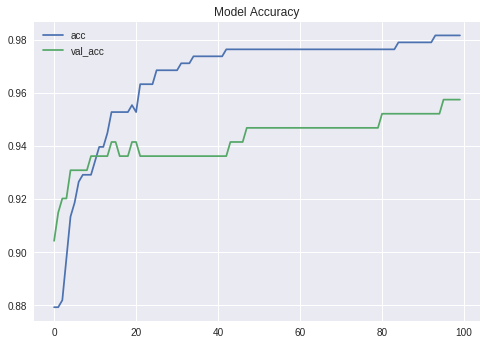

In [31]:
plt.plot(hist.history['accuracy'],label='acc')
plt.plot(hist.history['val_accuracy'],label='val_acc')
plt.title("Model Accuracy")
plt.legend()
plt.show()

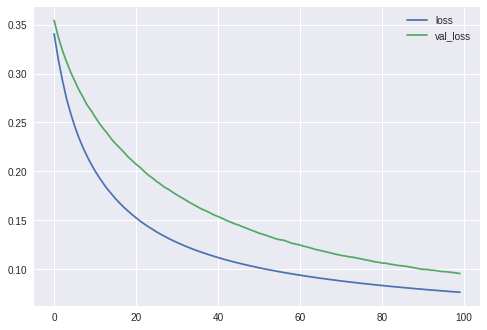

In [32]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()

In [42]:
#make prediction
p = model.predict(X_test)
p.shape

(188, 1)

In [41]:
#rounding the number to correct class
roud = np.round(p).flatten()
roud.shape

(188,)

In [44]:
#calculate the accuracy manually and comparing to evaulate

print("Manually calculated accuracy:", np.mean(roud == y_test))

Manually calculated accuracy: 0.9574468085106383


In [46]:
print("Using Evaluate function:", model.evaluate(X_test,y_test,verbose=False))

Using Evaluate function: [0.09557557629143938, 0.9574468]


In [47]:
#Lets now save our model to a file 
model.save('linearclassidier.h5')

In [49]:
!ls -lh

total 112K
-rw-rw-r-- 1 anandsm anandsm 89K Apr  7 17:53 1_Linear_classification.ipynb
-rw-rw-r-- 1 anandsm anandsm 19K Apr  7 17:55 linearclassidier.h5


In [51]:
#reload the model
model = tf.keras.models.load_model('linearclassidier.h5')
print(model.layers)
model.evaluate(X_test,y_test,verbose=False)

[0.09557557629143938, 0.9574468]